#  <span style="color:orange">Binary Classification Tutorial (CLF101) - Level Beginner</span>

# 1.0 Objective of Tutorial
Welcome to Binary Classification Tutorial (#CLF101). This tutorial assumes that you are new to PyCaret and looking to get started with Binary Classification using pycaret.classification Module.

In this tutorial using pycaret.classification we will learn:


* **Getting Data:**  How to import data from PyCaret repository?
* **Setting up Environment:**  How to setup experiment in PyCaret to get started with Modeling?
* **Create Model:**  How to create a model, perform stratified cross validation and evaluate classification metrics?
* **Tune Model:**  How to automatically tune the hyper-parameters of a Model?
* **Plot Model:**  How to analyze model performance using various plots? 
* **Finalize Model:**  How to finalize the best model at the end of experiment? What are the next steps?
* **Predict Model:**  How to make prediction on new and unseen dataset? 

Read Time : Approx 30 Minutes


## 1.1 Installing PyCaret
First step to get started with PyCaret is to install pycaret. Installing pycaret is easy and take few minutes only. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
pip install pycaret  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
!pip install pycaret


## 1.2 Pre-Requisites
- Python 3.x
- Latest version of pycaret
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Binary Classification


## 1.3 See also:
- Binary Classification Tutorial (CLF102) - Intermediate Level  __[Tutorial Link](https://www.github.com/pycaret/pcaret)__
- Binary Classification Tutorial (CLF103) - Expert Level __[Tutorial Link](https://www.github.com/pycaret/pcaret)__


# 2.0 What is Binary Classification?
Binary or binomial classification is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) on the basis of a classification rule. Contexts requiring a decision as to whether or not an item has some qualitative property, some specified characteristic, or some typical binary classification include:

- Medical testing to determine if a patient has certain disease or not – the classification property is the presence of the disease.
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a Go/no go classification.
- Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

https://en.wikipedia.org/wiki/Binary_classification



# 3.0 Overview of Classification Module in PyCaret
PyCaret's classification module (pycaret.classification) is a supervised learning module which is used for classifying the elements into binary group based on various techniques and algorithms. Some common use case of classification problem includes Predicting customer default (Yes or No), Predicting Customer Churn (Customer will leave or stay), Disease Found (Positive or Negative).

PyCaret classification module can be used for Binary or Multi-class classification problems. PyCaret's classification module library has over 18 algorithms and 14 plots to analyze the performance of your model. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24000 samples and 25 features. Short descriptions for which are as follows:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_0 to PAY_6:** Repayment status n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- **BILL_AMT1 to BILL_AMT6:** Amount of bill statement n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **PAY_AMT1 to PAY_AMT6:** Amount of payment n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **default:** Default payment (1=yes, 0=no) <span style="color:red">**(Target Column)**</span>

#### Dataset Acknowledgements:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ at the UCI Machine Learning Repository.

# 5.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using pandas read_csv function or you can use PyCaret's data respository to load the data using get_data function (This will require internet connection).

In [65]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [66]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the predict_model() function on unseen data, a sample of 1200 rows are taken out from original dataset to be used for predictions. This should not be confused with train/test split. This split is performed to simulate real life scenario. Another way to think about this is that these 1200 records were not available at the time machine learning experiment was performed.

In [155]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions (1200, 24)


# 6.0 Setting up Environment in PyCaret

**Setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must called before executing any other function in pycaret. It takes two mandatory parameters:
dataframe {array-like, sparse matrix} and name of the target column. All other parameters are optional.

When you will execute this function, PyCaret's inference algorithm will automatically detect the data type of all features. Correctly identifying the data type for features is the most fundamental step in machine learning. After automatically identifying the data types, PyCaret will show a grid of features and their inferred data types and will ask for confirmation. If all the data types are correctly inferred by PyCaret, you may  press enter to continue the experiment or type 'quit' to overwrite the data types using setup() parameters. For this experiment, all the data types are correctly identified.  In future tutorials (Intermediate and Expert), you will learn how to overwrite datatypes.

In [117]:
from pycaret.classification import *
exp1 = setup(data = data, target = 'default', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Once the setup is succesfully executed it prints the information grid that contains few important information. Much of the information is related to pre-processing pipeline which is constructed when setup() is executed. Much of these features are out of scope for the purpose of this tutorial. However, few important things to note at this stage are:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id was passed set as 123 for later reproducibility.<br/>
<br/>
- **Target Type :** Binary or Multiclass. Target type is automatically detected and shown. There is on difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :** When the Target variable is of type string ('Yes' or 'No') instead of 1 or 0. It will automatically encode the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment No Label encoding is required as target variable is of type numeric. <br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in original data it will show as True. For this experiment there are no missing values in the dataset. <br/>
<br/>
- **Numeric Features :**  Number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  Number of features inferred as categorical. In this dataset, 14 out of 24 features are inferred as numeric. <br/>
<br/>
- **Transformed Train Set :** Displays the shape of transformed training set. Notice that original shape of (22800, 24) is transformed into (15959, 91) for transformed train set. Number of samples are distributed between train and test/hold-out set (see below) and number of features have increased to 91 from 24 due to categorical encoding <br/>
<br/>
- **Transformed Test Set :** Displays the shape of transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on default value of 70/30 that can be changed using 'train_size' parameter in setup. <br/>

Notice that how few tasks that are necessary to perform modeling are automatically performed such as Missing value imputation (in this case there are no missing values), categorical encoding etc. Other parameters in setup are optional and used for customizing pre-processing pipeline. Most of these features are out of scope for this tutorial, but as you progress to intermediate and expert level, we will cover all the options in much detail in later tutorials).

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function train all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [118]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.8236,0,0.3646,0.6932,0.4776,0.3836
1,Linear Discriminant Analysis,0.8236,0.7703,0.3813,0.6818,0.4888,0.3923
2,Gradient Boosting Classifier,0.8225,0.7888,0.3652,0.6868,0.4765,0.3815
3,Extreme Gradient Boosting,0.8218,0.7894,0.3595,0.6862,0.4715,0.3767
4,Light Gradient Boosting Machine,0.8214,0.7859,0.3878,0.6663,0.49,0.3908
5,CatBoost Classifier,0.8213,0.7858,0.3858,0.666,0.4884,0.3893
6,Ada Boost Classifier,0.8185,0.7783,0.3507,0.6729,0.4607,0.3644
7,Random Forest Classifier,0.8093,0.7401,0.3363,0.6295,0.4382,0.3359
8,Extra Trees Classifier,0.8091,0.7501,0.3841,0.6083,0.4707,0.3615
9,Quadratic Discriminant Analysis,0.7892,0.739,0.1731,0.6275,0.2376,0.1696


One simple word of code ***(not even a line)*** has created over 15 models using 10 fold stratified cross validation and evaluated 6 most commonly use classification metrics (Accuracy, AUC, Recall, Precision, F1, Kappa). The score grid printed above highlights the highest performing metric for comparison purpose only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing sort parameter, For example compare_models(sort = 'AUC') will sort the grid by AUC instead of accuracy. If you want to change the fold parameter from default value of 10 to a different value then you can use fold parameter, For example compare_models(fold=5) to compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time.

___

# 8.0 Create a Model

While compare_models() is a great function and often a starting point in experiment but it doesn't return you any trained model. PyCaret's recommended experiment workflow is to use compare_models() right after setup to evaluate top performing models and finalize few candidate models to continue the experiment. As such, the function that actually allows to you create a model is create_model(). This function creates a model and scores it using Stratified Cross Validation. Similar to compare_models(), the output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models, our choice of selecting them as candidate model is for illustration purpose only and doesn't necessarily mean they are top performing or ideal model for this type of data.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

There are 18 classifiers available in the model library of PyCaret. Please see docstring for the list of all available models and their abbreviation string.

### 8.1 Decision Tree Classifier

In [121]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7224,0.6109,0.4108,0.3816,0.3956,0.2158
1,0.7199,0.6225,0.4448,0.3848,0.4126,0.2300
2,0.7400,0.6310,0.4363,0.4162,0.4260,0.2580
3,0.7262,0.6094,0.3966,0.3846,0.3905,0.2140
4,0.7306,0.6090,0.3909,0.3909,0.3909,0.2180
5,0.7331,0.6381,0.4646,0.4090,0.4350,0.2612
6,0.7155,0.6137,0.4306,0.3753,0.4011,0.2157
7,0.7462,0.6363,0.4391,0.4282,0.4336,0.2701
8,0.7318,0.6209,0.4221,0.3995,0.4105,0.2371
9,0.7354,0.6194,0.4079,0.4034,0.4056,0.2355


In [140]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 8.2 K Neighbors Classifier

In [125]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256


### 8.3 Random Forest Classifier

In [126]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8095,0.7531,0.3428,0.6269,0.4432,0.3400
1,0.8127,0.7451,0.3399,0.6452,0.4453,0.3453
2,0.8076,0.7714,0.3258,0.6250,0.4283,0.3262
3,0.7989,0.7185,0.3144,0.5842,0.4088,0.3006
4,0.8051,0.7249,0.3229,0.6129,0.4230,0.3191
5,0.8152,0.7324,0.3569,0.6495,0.4607,0.3603
6,0.8039,0.7244,0.3371,0.6010,0.4319,0.3246
7,0.8158,0.7711,0.3399,0.6630,0.4494,0.3523
8,0.8139,0.7183,0.3258,0.6609,0.4364,0.3400
9,0.8107,0.7419,0.3569,0.6269,0.4549,0.3506


Notice that Mean score of all models matches with the score printed in compare_models(). This is because the metrics printed in compare_models() score grid are average score of CV folds. Similar to compare_models(), if you want to change the fold parameter from default value of 10 to a different value then you can use fold parameter, For Example create_model('dt', fold = 5) to create Decision Tree Classifier using 5 fold stratified CV.

___

# 9.0 Tune a Model

When model is created using create_model() function it uses the default hyperparameters of the model. In order to tune the hyperparameter of models, tune_model() function can be used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using Stratified kfold cross validation. The output prints a score grid that shows Accuracy, AUC, Recall Precision, F1 and Kappa by fold.

### 9.1 Decision Tree Classifier

In [127]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8264,0.7217,0.3173,0.7568,0.4471,0.3640
1,0.8221,0.7243,0.3144,0.7255,0.4387,0.3521
2,0.8133,0.7419,0.2918,0.6821,0.4087,0.3184
3,0.8189,0.7070,0.3088,0.7078,0.4300,0.3415
4,0.8214,0.7029,0.3116,0.7237,0.4356,0.3490
5,0.8264,0.7308,0.3144,0.7603,0.4449,0.3624
6,0.8164,0.7119,0.2975,0.7000,0.4175,0.3290
7,0.8264,0.7408,0.3031,0.7754,0.4358,0.3557
8,0.8214,0.7012,0.3003,0.7361,0.4266,0.3423
9,0.8113,0.7174,0.3031,0.6605,0.4155,0.3210


In [139]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=78, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 9.2 K Neighbors Classifier

In [130]:
tuned_knn = tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7751,0.6495,0.0708,0.4464,0.1222,0.0657
1,0.7769,0.6661,0.0652,0.4694,0.1144,0.0640
2,0.7832,0.7060,0.1133,0.5479,0.1878,0.1212
3,0.7769,0.6409,0.0623,0.4681,0.1100,0.0612
4,0.7769,0.6503,0.0708,0.4717,0.1232,0.0694
5,0.7788,0.6848,0.0878,0.5000,0.1494,0.0892
6,0.7813,0.6518,0.0765,0.5400,0.1340,0.0837
7,0.7845,0.6588,0.0935,0.5789,0.1610,0.1060
8,0.7769,0.6564,0.0652,0.4694,0.1144,0.0640
9,0.7812,0.6802,0.0935,0.5323,0.1590,0.0995


### 9.3 Random Forest Classifier

In [136]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621


tune_model() function is a Random Grid Search of hyperparameters over a pre-defined search space. By default, it is set to optimize 'Accuracy' but this can be changed by passing optimize param. For example tune_model('dt', optimize = 'AUC') will optimize Decision Tree Classifier for AUC. In the above example, all the classifiers are optimized for Accuracy. Notice how the results have been improved.

- Decision Tree Classifier (Before: **0.7301** , After: **0.8204**)
- K Neighbors Classifier (Before: **0.7505** , After: **0.7792**)
- Random Forest Classifier (Before: **0.8093** , After: **0.8225**)

Although metrics alone are not the only criteria you should consider when finalizing the best model for production, there are few other factors to consider such as training time, standard deviation of kfolds etc. As you progress through the tutorial, we have discussed those factors in detail in Intermediate and Expert level. for Now, let's move forward considering Random Forest Classifier as our best model. We will complete the remaining tutorial using Tuned Random Forest Classifier.

___

# 10.0 Plot a Model

Before or after finalizing the model, plot_model() function can be used to analyze the performance of model over different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see docstring for list of available plots.

### 10.1 AUC Plot

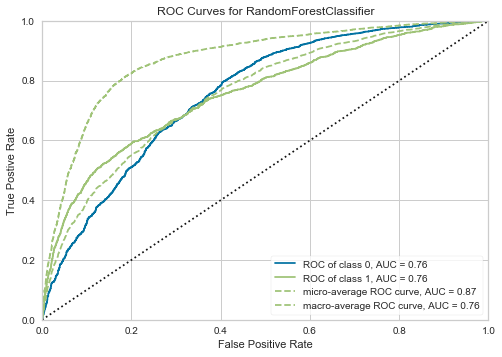

In [156]:
plot_model(tuned_rf, plot = 'auc')

### 10.2 Precision-Recall Curve

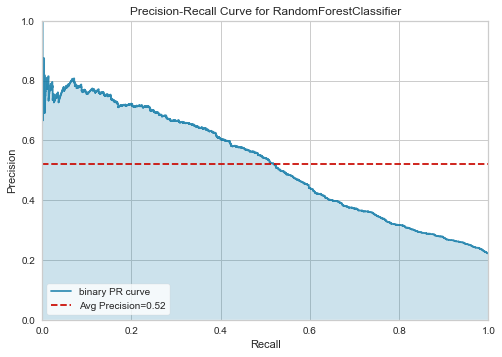

In [158]:
plot_model(tuned_rf, plot = 'pr')

### 10.3 Feature Importance Plot

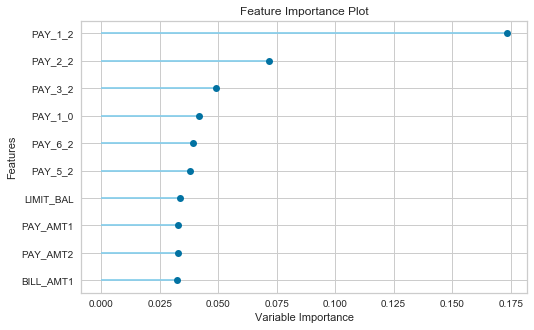

In [163]:
plot_model(tuned_rf, plot='feature')

### 10.4 Confusion Matrix

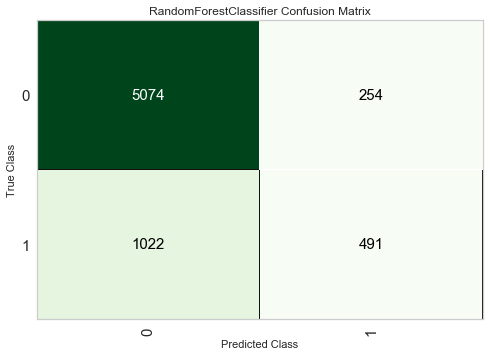

In [166]:
plot_model(tuned_rf, plot = 'confusion_matrix')

Another way to analyze performance of models is to use evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function. 

In [165]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is good the perform one final check by predicting the test / hold-out set and evaluating classification metrics on hold-out set. If you see information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been categorized as test / hold-out sample. All the evaluation metrics we have seen above is cross validated results based on training set. Now using our final trained model stored in tuned_rf variable we will predict the hold-out sample and evaluate the metrics.

In [173]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383


Accuracy on hold-out sample is **0.8135** compared with tuned_rf CV results (in section 9.3 above) of **0.8225**. This is close enough to rely on this model. If the difference between CV results and hold-out is large enough, this would normally mean over-fitting, but could also be due to several other factors and would require investigation. In this case, we will move forward with finalizing this model and predict on unseen data (5% that we had separated in the beginning - that was never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using create_model)

# 12.0 Finalize Model for Deployment

Finalize Model is normally the last step in the experiment. In a normal machine learning workflow which starts with comparing all models and selecting few candidates (based on the metric of interest) to perform detail modeling steps (hyperparameter tuning, ensembling, stacking etc). This workflow will lead you to the best model which you would like to use for making prediction on unseen data, before finalizing you would want to check the score on hold-out set which is the one final check before you finalize the model. finalize_model() function fits the model onto the complete dataset including hold-out sample. The purpose of this function is to prepare the final model to generate predictions on unseen data.

In [168]:
final_rf = finalize_model(tuned_rf)

In [170]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


**Caution:** One final word of caution. Once the model is finalized using finalize_model(), it trained the model on entire dataset including hold-out. As such, if the final model is used for predictions on hold-out sample, the information grid printed is misleading as you are trying to predict the same data that was used for modeling. In order to only demonstrate this point, we will use final_rf under predict_model() to compare the information grid with the one above in section 11. 

In [174]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082


As you can see AUC in the final_rf is increased to **0.8222** from **0.7563**, even though the model is same. This is because final_rf variable is trained on the complete dataset.

# 13.0 Predict on unseen data

predict_model() function can be also be used to predict the unseen dataset. The only difference from section 11 above is this time we will pass data_unseen as a data parameter in predict_model(). data_unseen is the variable created in the beginning and it contains 5% (1200 samples) of the original dataset that was never exposed to PyCaret. 

In [177]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1591
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7779
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,1,0.6478
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.5038
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1394


Notice the last two columns 'Label' and 'Score'. Label is the prediction and score is the probability of prediction. Notice that predicted results are concated to the original dataset while all the transformations including imputation of missing values (in this case None), categorical encoding, feature extraction etc. is performed under the hood and you dont have to manage the pipeline manually. All this is done automatically in PyCaret.

# 14.0 Next Steps?